## Feature Analysis

In this notebook we will analyze the statistics of some of the features we selected to estimate their importance and the impact on the model

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
df = pd.read_csv('../quiniela/features.csv')

In [39]:
features = ['season','division','matchday','result','home_rank','away_rank','home_form','away_form','home_GF_pg',
              'home_GA_pg','away_GF_pg','away_GA_pg','home_rank_HT','away_rank_AT','last_conf']
df_features = df[df['season']<2021][features]

### Season

We start with the season. As football evolves we may assume that the distribution of results changes over time due to different aspects of the game.

c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col 

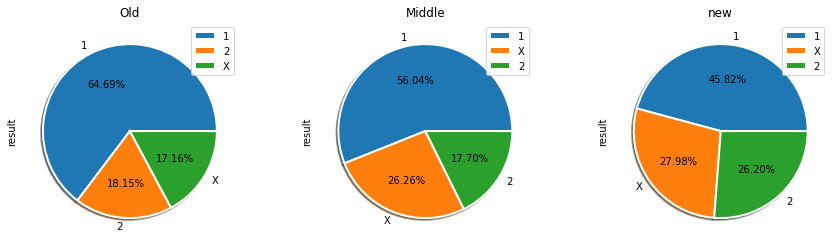

In [40]:
df_old = df_features[df_features.season < 1960]
df_middle = df_features[(df_features.season >= 1960) & (df_features.season < 1995)]
df_new = df_features[df_features.season >= 1995]

fig , ax = plt.subplots(1,3, figsize = (15,4))

df_old.result.value_counts().plot(kind = 'pie',title = "Old",autopct='%1.2f%%', legend = True, ax = ax[0], shadow = True, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
df_middle.result.value_counts().plot(kind = 'pie',title = "Middle",autopct='%1.2f%%',ax = ax[1], legend = True, shadow = True, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
df_new.result.value_counts().plot(kind = 'pie',title = "new",autopct='%1.2f%%', ax = ax[2], legend = True, shadow = True, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
plt.show()

This split into old, middle and new gives an idea of the evolution. It seems like the importance of beeing the home team in order to win a game decreased with the years. Therefor we observe more ties and away wins. We support that with another plot.

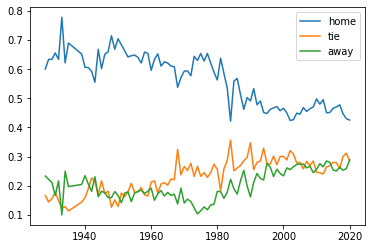

In [41]:
seasons = df_features.season.unique()

home = []
tie = []
away = []

for seas in seasons:
    frame = df_features[df_features.season == seas]
    counts = pd.DataFrame(frame.result.value_counts())
    games = len(frame)
    home.append(counts.loc['1']  /  games)
    tie.append(counts.loc['X']  /  games)
    away.append(counts.loc['2']  /  games)

plt.plot(seasons,home, label = 'home')
plt.plot(seasons,tie, label = 'tie')
plt.plot(seasons ,away, label = 'away')
plt.legend()
plt.show()

Again we see the change with the years. With more years there tend to be more ties and away wins, though the increase of away wins starts at the late 70s.

### Division

We now study the impact of the division on the distribution of the results.

c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


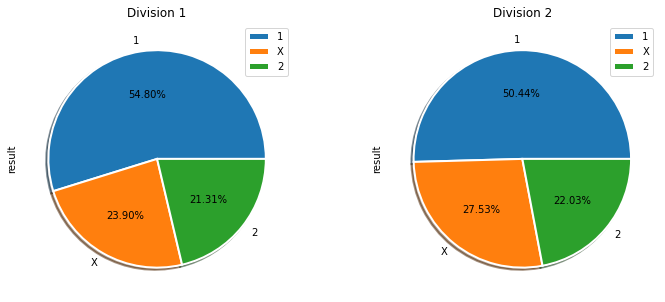

In [42]:
df_first = df_features[df_features.division == 1]
df_second = df_features[df_features.division == 2]

fig , ax = plt.subplots(1,2, figsize = (12,5))

df_first.result.value_counts().plot(kind = 'pie',title = "Division 1",autopct='%1.2f%%', legend = True, ax = ax[0], shadow = True, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
df_second.result.value_counts().plot(kind = 'pie',title = "Division 2",autopct='%1.2f%%',ax = ax[1], legend = True, shadow = True, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})

plt.show()

We notice slide differences. There are a bit more ties in the second devision and less home wins but these differences are rather small to make a guess on the impact of that feature. 
Again we look at the development over time.

In [43]:
seasons = df_first.season.unique()

home = []
tie = []
away = []

for seas in seasons:
    frame = df_first[df_first.season == seas]
    counts = pd.DataFrame(frame.result.value_counts())
    games = len(frame)
    home.append(counts.loc['1']  /  games)
    tie.append(counts.loc['X']  /  games)
    away.append(counts.loc['2']  /  games)
    
seasons_2 = df_second.season.unique()

home_2 = []
tie_2 = []
away_2 = []

for seas in seasons_2:
    frame = df_second[df_second.season == seas]
    counts = pd.DataFrame(frame.result.value_counts())
    games = len(frame)
    home_2.append(counts.loc['1']  /  games)
    tie_2.append(counts.loc['X']  /  games)
    away_2.append(counts.loc['2']  /  games)

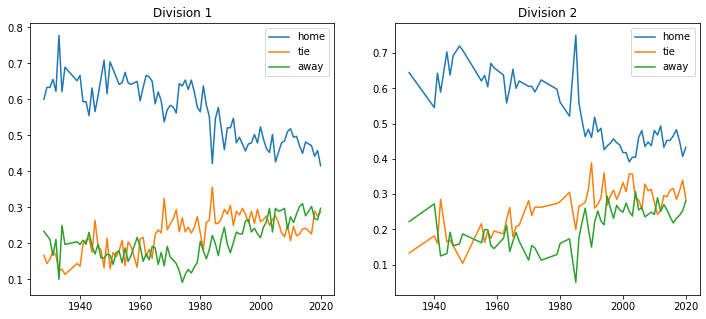

In [44]:
fig , ax = plt.subplots(1,2, figsize = (12,5))

ax[0].plot(seasons,home, label = 'home')
ax[0].plot(seasons,tie, label = 'tie')
ax[0].plot(seasons ,away, label = 'away')
ax[0].legend()
ax[0].set_title('Division 1')

ax[1].plot(seasons_2,home_2, label = 'home')
ax[1].plot(seasons_2,tie_2, label = 'tie')
ax[1].plot(seasons_2 ,away_2, label = 'away')
ax[1].legend()
ax[1].set_title('Division 2')
plt.show()

As the plot shows the general picture is nearly the same in both divisions. So the development of the distribution of the results does not seem to come from the division itself but rather from a more general cause. So we won't use the division as a feature in the final models.

### Rank

Now we are going to study a feature which we expect to have a high impact on the results, namely the rank of the two oponents.

In [45]:
def jitter(values):
    return values + np.random.normal(0,0.1,values.shape)

In [46]:
h = jitter(df_features.home_rank)
a =  jitter(df_features.away_rank)

In [47]:
frame = pd.DataFrame()
frame['home_rank'] = h
frame['away_rank'] = a
frame['result'] = df_features.result

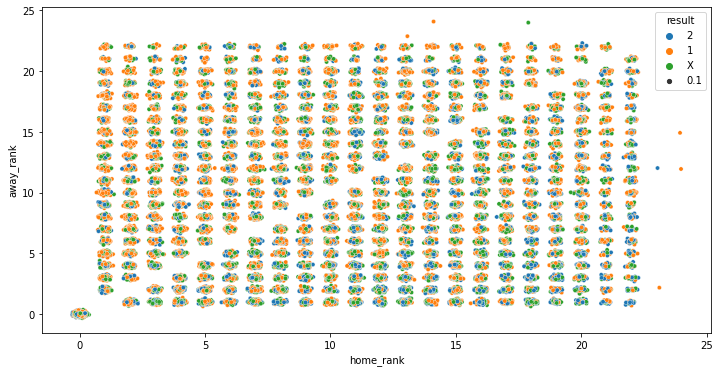

In [48]:
fig , ax = plt.subplots(1,1,figsize=(12, 6))
sns.scatterplot(x = 'home_rank', y = 'away_rank', data = frame, alpha = 1,size = 0.1, hue ='result', ax = ax)
plt.show()

We see that as we go from the left to the right the plot goes in majoraty from orange to green and then to blue. That means if the home team has a better rank than the away team then it is more likely that the home team wins. On the diagonal line we see that matches of teams with nearly the same rank are more dificult to predict. However the results seem to be a bit in favor for the home teams. The rank of the teams therefor is an important feature in the model.

### Rank in home and away table

Although a time might have a rank in the middle, it could be the case that it performs home way better and gets all his points there than it does away. One might to try to account for the special home performance of a team against the away performance of the oponent. We want to do that here with the rank of the home team in the home table and the rank of the away team in the away table.

In [49]:
b = jitter(df_features.home_rank_HT)
c =  jitter(df_features.away_rank_AT)

In [50]:
frame_2 = pd.DataFrame()
frame_2['home_rank_HT'] = b
frame_2['away_rank_AT'] = c
frame_2['result'] = df_features.result

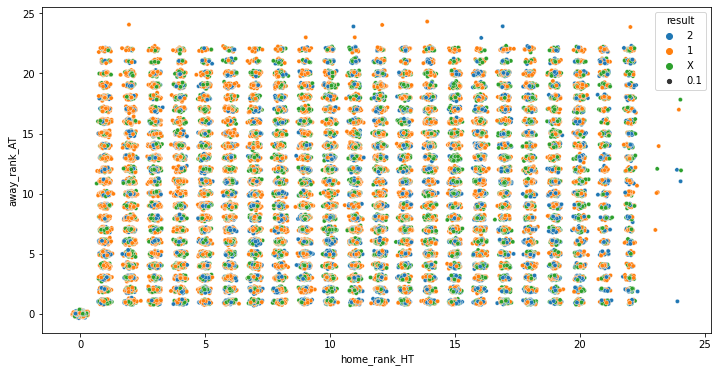

In [51]:
fig , ax = plt.subplots(1,1,figsize=(12, 6))
sns.scatterplot(x = 'home_rank_HT', y = 'away_rank_AT', data = frame_2, alpha = 1,size = 0.1, hue ='result', ax = ax)
plt.show()

In [52]:
frame_3 = df_features[['home_rank_HT','away_rank_AT','result']].copy()
frame_3['rank_diff'] = frame_3.home_rank_HT - frame_3.away_rank_AT

In [53]:
frame_4 = df_features[['home_rank','away_rank','result']].copy()
frame_4['rank_diff'] = frame_4.home_rank - frame_4.away_rank

We now analyze the distributions of results for different rank differences. For that we divide the games in different groups: The ones where the home team is more than 10 ranks higher (high), between 10 and 0 ranks higher (med_high), between 0 and 10 ranks lower (med_low) or more than 10 ranks lower than the away team (low).

In [55]:
def group(row):
    if row.rank_diff < -10 :
        return 'high'
    elif (row.rank_diff >= -10) & (row.rank_diff <0) :
        return 'med_high'
    elif row.rank_diff > 10 :
        return 'low'
    else :
        return 'med_low'

In [56]:
frame_3['group'] = frame_3.apply(group, axis = 1)
frame_4['group'] = frame_4.apply(group, axis = 1)

These are the distributions of the results in the groups when using the difference in the overall rank:

c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col 

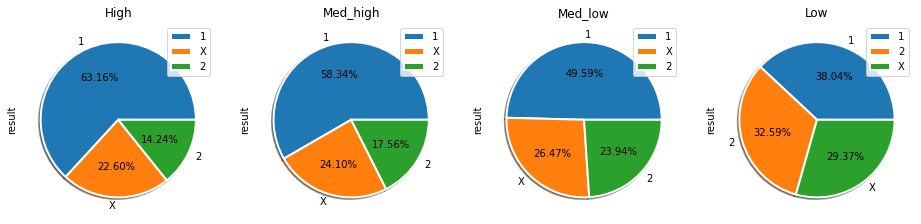

In [57]:
fig , ax = plt.subplots(1,4, figsize = (16,4))

frame_3[frame_3.group == 'high'].result.value_counts().plot(kind = 'pie',title = "High",autopct='%1.2f%%', legend = True, ax = ax[0], shadow = True, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
frame_3[frame_3.group == 'med_high'].result.value_counts().plot(kind = 'pie',title = "Med_high",autopct='%1.2f%%',ax = ax[1], legend = True, shadow = True, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
frame_3[frame_3.group == 'med_low'].result.value_counts().plot(kind = 'pie',title = "Med_low",autopct='%1.2f%%', ax = ax[2], legend = True, shadow = True, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
frame_3[frame_3.group == 'low'].result.value_counts().plot(kind = 'pie',title = "Low",autopct='%1.2f%%', ax = ax[3], legend = True, shadow = True, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
plt.show()

And here we see the distribution of the results when using the rank in the home and away table.

c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col 

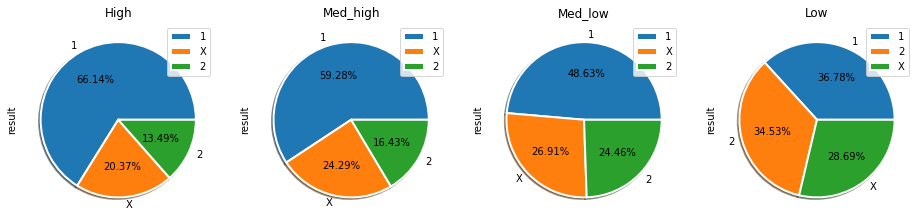

In [58]:
fig , ax = plt.subplots(1,4, figsize = (16,4))

frame_4[frame_4.group == 'high'].result.value_counts().plot(kind = 'pie',title = "High",autopct='%1.2f%%', legend = True, ax = ax[0], shadow = True, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
frame_4[frame_4.group == 'med_high'].result.value_counts().plot(kind = 'pie',title = "Med_high",autopct='%1.2f%%',ax = ax[1], legend = True, shadow = True, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
frame_4[frame_4.group == 'med_low'].result.value_counts().plot(kind = 'pie',title = "Med_low",autopct='%1.2f%%', ax = ax[2], legend = True, shadow = True, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
frame_4[frame_4.group == 'low'].result.value_counts().plot(kind = 'pie',title = "Low",autopct='%1.2f%%', ax = ax[3], legend = True, shadow = True, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})
plt.show()

We see that they are quite similar.

In [59]:
np.corrcoef(df_features.home_rank_HT, df_features.home_rank)

array([[1.        , 0.80752838],
       [0.80752838, 1.        ]])

Like the total rank, the rank in the home table and away table have high predictive power. They are highly correlated
but the specific ranks might bring some extra insights that the general would not provide. It thus makes sense to 
keep this feature in the model.

### Form

We now wish to analyse the form of the two teams. A worse team might still win a game against a better team due to better form in the last games. So the home_form and away_form might be valuable features in the model.

In [60]:
feat = pd.DataFrame()

In [61]:
def jitter_2(values):
    return values + np.random.normal(0,0.2,values.shape)


In [62]:
feat['home_form'] = jitter_2(df_features.home_form)
feat['away_form'] = jitter_2(df_features.away_form)
feat['result'] = df_features.result

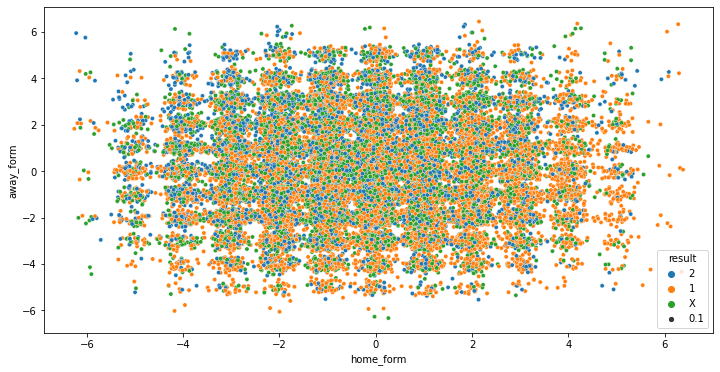

In [63]:
fig , ax = plt.subplots(1,1,figsize=(12, 6))
sns.scatterplot(x = 'home_form', y = 'away_form', data = feat, alpha = 1,size = 0.1, hue ='result', ax = ax)
plt.show()

In [64]:
forms = df_features.home_form.unique()

In [65]:
hw = []
aw = []
tt = []
for f in forms:
    l = len(df_features[df_features.home_form == f])
    h = len(df_features[(df_features.home_form == f) & (df_features.result == '1')])
    a = len(df_features[(df_features.home_form == f) & (df_features.result == '2')])
    t = len(df_features[(df_features.home_form == f) & (df_features.result == 'X')])
    hw.append(h / l)
    aw.append(a / l)
    tt.append( t / l)


In [66]:
form_2 = pd.DataFrame()
form_2['home_form'] = forms
form_2['home_wins'] = hw
form_2['away_wins'] = aw
form_2['ties'] = tt
form_2

,home_form,home_wins,away_wins,ties
0,0.0,0.517719,0.223188,0.259093
1,1.0,0.540802,0.197581,0.261617
2,-1.0,0.508746,0.226354,0.264900
3,-2.0,0.498191,0.243257,0.258553
4,2.0,0.573317,0.178439,0.248245
5,3.0,0.620477,0.163972,0.215550
6,-4.0,0.460938,0.277344,0.261719
7,-5.0,0.422604,0.312039,0.265356
8,4.0,0.692698,0.107505,0.199797
9,-3.0,0.474344,0.262828,0.262828


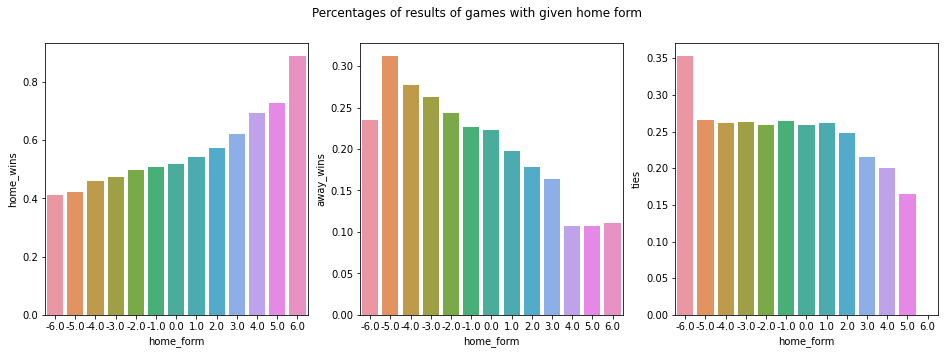

In [67]:
fig , ax = plt.subplots(1,3,figsize=(16, 5))

sns.barplot(x = 'home_form', y= 'home_wins', data = form_2, ax = ax[0])
sns.barplot(x = 'home_form', y= 'away_wins', data = form_2 , ax = ax[1])
sns.barplot(x = 'home_form', y= 'ties', data = form_2 , ax = ax[2])
fig.suptitle('Percentages of results of games with given home form')
plt.show()

The plots support the idea. We see that the better the form of the home team the better the chances to win the next
game at home. It is interesting to see however that the percentage of ties among the games seems to be quite stable and doesen't vary with the form of the home team.

### Last confrontations

Another historical feature might be the results of the last games the teams played against each other with exact the same 
constellation. Some teams are just not able to win a game against a specific oponent at home or away.

In [68]:
conf = df_features.last_conf.unique()

hw_2 = []
aw_2 = []
tt_2 = []
for c in conf:
    l = len(df_features[df_features.last_conf == c])
    h = len(df_features[(df_features.last_conf == c) & (df_features.result == '1')])
    a = len(df_features[(df_features.last_conf == c) & (df_features.result == '2')])
    t = len(df_features[(df_features.last_conf == c) & (df_features.result == 'X')])
    hw_2.append(h / l)
    aw_2.append(a / l)
    tt_2.append( t / l)

In [69]:
confs = pd.DataFrame()
confs['last_conf'] = conf
confs['last_conf'] = conf
confs['home_wins'] = hw_2
confs['away_wins'] = aw_2
confs['ties'] = tt_2
confs

,last_conf,home_wins,away_wins,ties
0,0,0.517332,0.223328,0.259340
1,1,0.535352,0.208897,0.255751
2,-1,0.452537,0.275368,0.272095
3,2,0.552152,0.193544,0.254304
4,-2,0.397757,0.332454,0.269789
5,3,0.616192,0.155422,0.228386
6,-3,0.366738,0.347548,0.285714


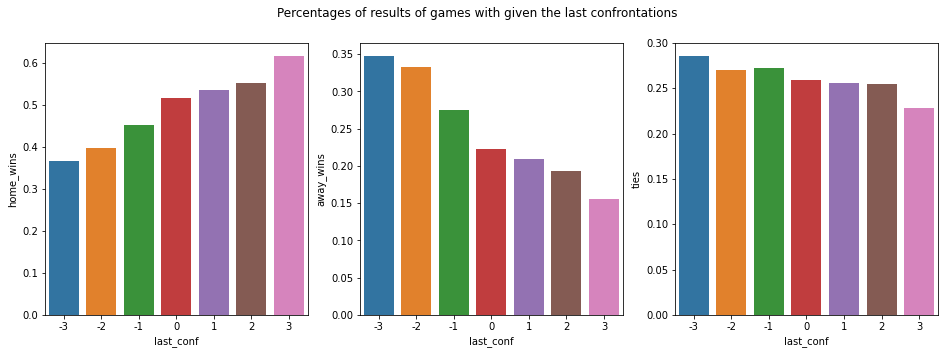

In [70]:
fig , ax = plt.subplots(1,3,figsize=(16, 5))

sns.barplot(x = 'last_conf', y= 'home_wins', data = confs, ax = ax[0])
sns.barplot(x = 'last_conf', y= 'away_wins', data = confs , ax = ax[1])
sns.barplot(x = 'last_conf', y= 'ties', data = confs , ax = ax[2])
fig.suptitle('Percentages of results of games with given the last confrontations')
plt.show()

The plot again supports the idea. If a home team shows a good short term historical record at home against the oponent then it is more likely to win the next home match as well. This might be explained buy psychological fenomena or that some teams play very well against a certain type of oponent. It might bring some insights to include such historical records in the model.

### Average goals scored and conceded

In the end we are going to take a look at the offenses and defenses. It is indeed important if a team with good offense plays against a bad defense or a good one. 

In [71]:
goals = df_features[df_features.matchday > 7][['home_GF_pg','home_GA_pg','away_GF_pg','away_GA_pg','result']]

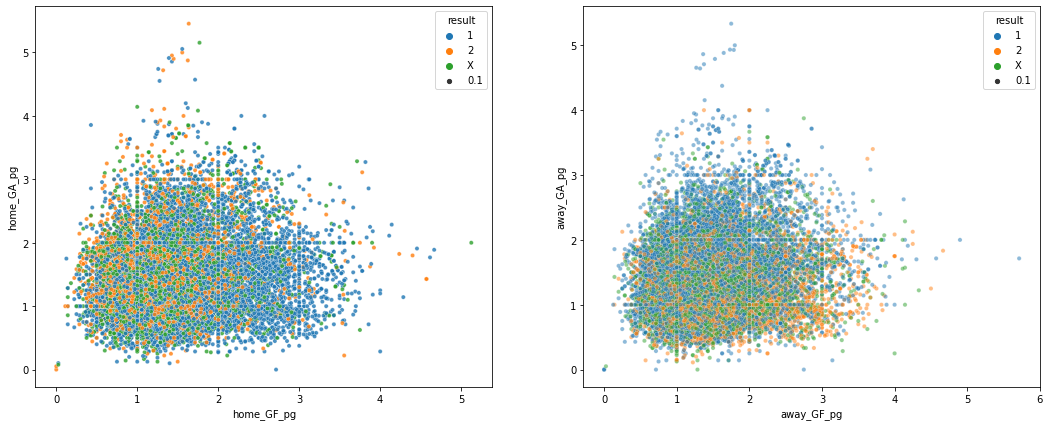

In [72]:
fig , ax = plt.subplots(1,2,figsize=(18,7))

sns.scatterplot(x = 'home_GF_pg', y= 'home_GA_pg', data = goals ,size = 0.1, hue = 'result',alpha = 0.8, ax = ax[0])
sns.scatterplot(x = 'away_GF_pg', y= 'away_GA_pg', data = goals , hue = 'result', size = 0.1, alpha = 0.5, ax = ax[1])
#sns.scatterplot(x = 'home_GF_pg', y= 'home_GA_pg', data = goals[goals.result == 'X'] , hue = 'away_GF_pg', ax = ax[2])
#fig.suptitle('Percentages of results of games with given the last confrontations')
plt.show()

The plot shows that for a home win a good offense seems to be more important than a good defense as the plot changes from orange to blue more from left to right than from up to down. On the away team we observe something different. Again the offense is important but we observe also more importance of the defense as the plot changes the color more from up to buttom than for the home team. Indeed this makes sense. Home teams tend to play more offensive since they play in front of their fans. Away team tend to play more defense. So the role of the defense is more important for the away team. However both offense and defense are import, still they have another weight depending on the home or away team.